In [ ]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

상품을 검색할 키워드를 입력하세요: 바지
표시할 상품 수를 입력하세요: 100
쇼핑 정보가 바지_products.csv 파일로 저장되었습니다.


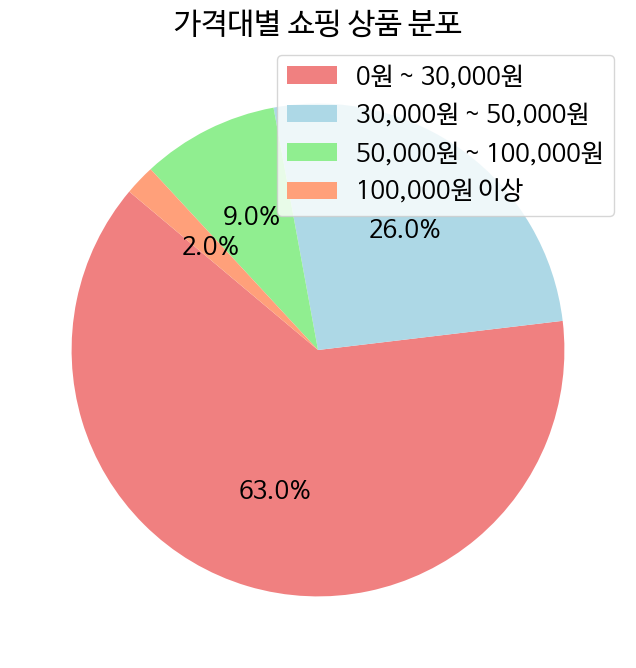

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

def search_naver_shopping(query, display=10):
    base_url = "https://openapi.naver.com/v1/search/shop.json"

    # 여러분이 발급받은 네이버 API의 클라이언트 ID와 클라이언트 시크릿을 사용
    client_id = "Aq3ISnqPd8cAlKKpFtDH"
    client_secret = "YJHg1fLqUa"

    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret,
    }

    params = {
        "query": query,
        "display": display,
        "start": 1,
        "sort": "sim",
    }

    response = requests.get(base_url, headers=headers, params=params)
    shopping_data = response.json()

    return shopping_data

def save_to_csv(shopping_data, csv_filename):
    if 'items' in shopping_data:
        items = shopping_data['items']
        products = []

        for item in items:
            title = item.get('title', '')
            price = item.get('lprice', '')
            mall_name = item.get('mallName', '')

            products.append({
                "Title": title,
                "Price": price,
                "MallName": mall_name
            })

        df = pd.DataFrame(products)
        df.to_csv(csv_filename, index=False, encoding="utf-8-sig")
        print(f"쇼핑 정보가 {csv_filename} 파일로 저장되었습니다.")
    else:
        print("검색 결과가 없습니다.")

def visualize_price_distribution(csv_filename):
    df = pd.read_csv(csv_filename)

    # 가격 범위 설정
    bins = [0, 30000, 50000, 100000, float('inf')]
    labels = ['0원 ~ 30,000원', '30,000원 ~ 50,000원', '50,000원 ~ 100,000원', '100,000원 이상']

    # 가격 범위에 따른 상품 수 계산
    df['PriceRange'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)
    price_distribution = df['PriceRange'].value_counts()

    # 원형 차트 시각화
    plt.figure(figsize=(8, 8))
    font_name = 'NanumGothic'
    rc('font', family=font_name)

    plt.pie(price_distribution, labels=None, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon'])

    plt.legend(labels=price_distribution.index, loc='upper right')

    plt.title('가격대별 쇼핑 상품 분포')
    plt.show()

if __name__ == "__main__":
    query = input("상품을 검색할 키워드를 입력하세요: ")
    display_count = int(input("표시할 상품 수를 입력하세요: "))

    csv_filename = f"{query}_products.csv"

    shopping_data = search_naver_shopping(query, display_count)
    save_to_csv(shopping_data, csv_filename)

    visualize_price_distribution(csv_filename)